In [9]:
from webscrape import *

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pyEX as p

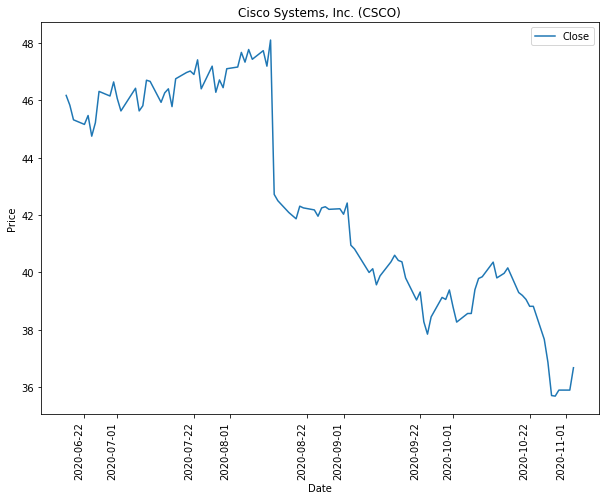

            Close
Date             
2020-06-17  46.17
2020-06-18  45.83
2020-06-19  45.32
2020-06-22  45.16
2020-06-23  45.47
...           ...
2020-10-28  35.71
2020-10-29  35.69
2020-10-30  35.90
2020-11-02  35.90
2020-11-03  36.68

[98 rows x 1 columns]


In [30]:
url = get_url("csco")
write_to_csv(url)

df = pd.read_csv('output.csv', index_col=0, parse_dates=True, usecols = ["Date", "Close"])
df = df.reindex(index=df.index[::-1])

df.plot(y="Close", ylabel="Price", figsize=(10,8), title=get_company_name(url), rot=90)
plt.show()
print(df)

TypeError: plot got an unexpected keyword argument 'y'

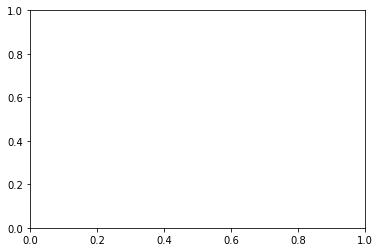

In [34]:
exp1 = df.ewm(span=12, adjust=False).mean()
exp2 = df.ewm(span=26, adjust=False).mean()

macd = exp1 - exp2
exp3 = macd.ewm(span=9, adjust=False).mean()

plt.plot(y=macd, label="MACD", color = '#EBD2BE')
plt.plot(y=exp3, label='Signal Line', color='#E5A4CB')
plt.legend(loc='upper left')
plt.show()